Before writing any code, import various libraries, import pandas, and import BeautifulSoup

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import scipy
from matplotlib import pyplot as plt
import os,errno
import glob
import re
re.compile('<title>(.*)</title>')


re.compile(r'<title>(.*)</title>', re.UNICODE)

Take the Wikipedia URL and use pandas to read and identify a data table within the Wikipedia page linked as the URL, world_area = pd.read_html(url, match = "Country / dependency"). Create a data frame, world_area_df, and convert the data frame to a csv to download the raw data. Print the data frame to show the raw data in tabular form.

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area"
world_area = pd.read_html(url, match = "Country / dependency")
world_area[0]
world_area_df = pd.DataFrame(world_area[0])
world_area_df
world_area_df.to_csv("Country_Area.csv")
from google.colab import files
files.download("Country_Area.csv")
world_area_df


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unnamed: 0,Country / dependency,Total in km2 (mi2),Land in km2 (mi2),Water in km2 (mi2),% water,Unnamed: 6
0,NaN,Earth,"510,072,000 (196,940,000)","148,940,000 (57,506,000)","361,132,000 (139,434,000)",70.8,NaN
1,1,Russia,"17,098,246 (6,601,667)","16,378,410 (6,323,737)","719,836 (277,930)",4.2,[b]
2,NaN,Antarctica,"14,200,000 (5,480,000)","14,200,000 (5,480,000)",0,0.0,[c]
3,2,Canada,"9,984,670 (3,855,100)","9,093,507 (3,511,021)","891,163 (344,080)",8.9,[d]
4,3 or 4 [e],China,"9,596,961 (3,705,406)","9,326,410 (3,600,950)","270,550 (104,460)",2.8,[f][1]
...,...,...,...,...,...,...,...
260,NaN,Ashmore and Cartier Islands (Australia),5.0 (1.9),5.0 (1.9),0,0.0,NaN
261,NaN,Spratly Islands (disputed),2.0 (0.77),2.0 (0.77),0,0.0,NaN
262,NaN,Coral Sea Islands (Australia),2.0 (0.77),2.0 (0.77),0,0.0,NaN
263,194,Monaco,2.0 (0.77),2.0 (0.77),0,0.0,[dp]


Create a new data frame, world_area2, and take and clean elements of the original data frame, world_area_df. This step changes the titles of columns between data frames, such as changing 'Country / dependency' to 'Country/Territory/Dependency', world_area2['Country/Territory/Dependency'] = world_area_df['Country / dependency']  and also removes unnecessary columns such as %water and both unnamed columns at the 0 and 6 index.

In [3]:
world_area2 = pd.DataFrame()
world_area2['Country/Territory/Dependency'] = world_area_df['Country / dependency']
world_area2['Total area in km2'] = world_area_df['Total in km2 (mi2)']
world_area2['Land in km2'] = world_area_df['Land in km2 (mi2)']
world_area2['Water in km2'] = world_area_df['Water in km2 (mi2)']
world_area2
world_area2.to_csv("Country_area_clean.csv")
from google.colab import files
files.download("Country_area_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This is another cleaning step in which we remove the numbers in the columns inside parentheses, (mi2), since we removed the mi2 label from the column titles in the previous step. This involves converting the data to strings and then using .apply to remove all characters inside the parentheses. Another csv is downloaded, this time in the cleanest and most refined state. An example of the code that would do this is: world_area2['Land in km2'] = world_area2['Land in km2'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))

In [36]:
world_area2['Total area in km2'] = world_area2['Total area in km2'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
world_area2['Land in km2']=world_area2['Land in km2'].apply(str)
world_area2['Land in km2'] = world_area2['Land in km2'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
world_area2['Water in km2']=world_area2['Water in km2'].apply(str)
world_area2['Water in km2'] = world_area2['Water in km2'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
world_area2
world_area2.to_csv("Country_Area_Cleaner.csv")
from google.colab import files
files.download("Country_Area_Cleaner.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Some descriptions about the data include that the data is organized by greatest area in km2 to least area in km2, with total land and water area as additional data points. The most important things about the data include the order of area in km2 of the points and what's interesting are the points about total land and water area in km2.

In this step, we make a bar graph of the 10 largest Countries/Territories/Dependencies on earth. Since earth is the first row, we plot data from row index 1-10, rather than 0-9. This bar graph has the name of the location on the X axis and the total area in km2 on the Y axis, meaning that the two columns from the data used are "Country/Territory/Dependency" and "Total area in km2". To make the bar graph a for loop is required that loops through the rows and columns placing them in specifed varibles to plot.The lowest data point is the 10th largest area, Kazakstan, and the highest data point is the largest area, Russia, in km2. The title of the bar graph is Country vs Total area in km2.

Text(0.5, 1.0, 'Country vs Total area in km2')

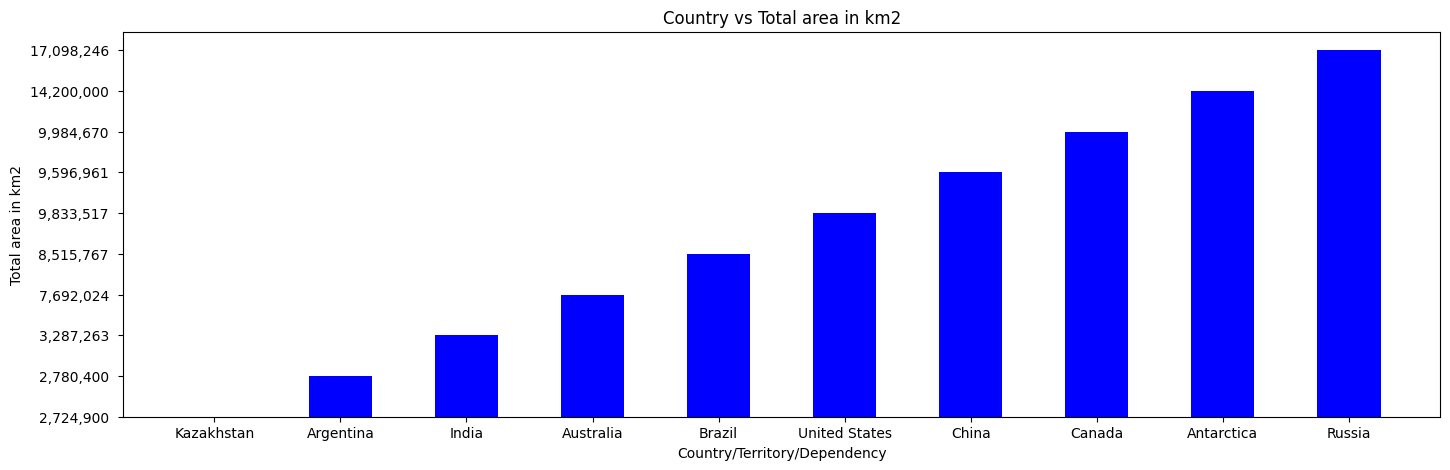

In [27]:
first_ten_rows = [10,9,8,7,6,5,4,3,2,1]

column1 = world_area2["Country/Territory/Dependency"]
column2 = world_area2["Total area in km2"]
##column3 = world_area2["Land in km2"]
selected_Country = []
selected_Area = []
##selected_Land = []
for row_id in first_ten_rows:
    selected_Country.append(column1[row_id])
    selected_Area.append(column2[row_id])
    ##selected_Land.append(column3[row_id])



# Now plot our bar graph
plt.figure(figsize=(17,5))
plt.bar(selected_Country, selected_Area, color ='blue', width = .5)

# Now add axis labels with units
plt.xlabel("Country/Territory/Dependency")
plt.ylabel("Total area in km2")

# We can add a title too
plt.title("Country vs Total area in km2")

Here we make a new data frame, world_area3, using the cleaned data from the world_area2 data frame. The purpose of this step is to create an identical data frame to be used to produce more visual graphs.

In [28]:
import pandas as pd
world_area3 = pd.DataFrame()
world_area3['Country/Territory/Dependency'] = world_area2['Country/Territory/Dependency']
world_area3['Total area in km2'] = world_area2['Total area in km2']
world_area3['Land in km2'] = world_area2['Land in km2']
world_area3['Water in km2'] = world_area2['Water in km2']
##world_area2.to_csv("Country_area_cleaner.csv")
##from google.colab import files
##files.download("Country_area_cleaner.csv")
world_area3


,Country/Territory/Dependency,Total area in km2,Land in km2,Water in km2
0,Earth,"510,072,000","148,940,000","361,132,000"
1,Russia,"17,098,246","16,378,410","719,836"
2,Antarctica,"14,200,000","14,200,000",0
3,Canada,"9,984,670","9,093,507","891,163"
4,China,"9,596,961","9,326,410","270,550"
...,...,...,...,...
260,Ashmore and Cartier Islands (Australia),5.0,5.0,0
261,Spratly Islands (disputed),2.0,2.0,0
262,Coral Sea Islands (Australia),2.0,2.0,0
263,Monaco,2.0,2.0,0


No charts were generated by quickchart


Now we make another bar graph but this time a stacked bar graph that has one color for land area and another color for water area that adds up to total area. This is an easy way to see the total area of each of these Countries/Territories/Dependencies while also seeing the land-to-water ratio in each of them. A key part of this step is remvoing the commas, world_area3 = world_area3.replace(',', '', regex=True), in the data so the data can be graphed and casting the data types of land and water in km2 to integers, total["Water in km2"] = total["Water in km2"].astype(int). The graph is titled Area, Land vs Water in km2 with Countries/Territories/Dependencies on the x axis and total area in km2 on the y axis.

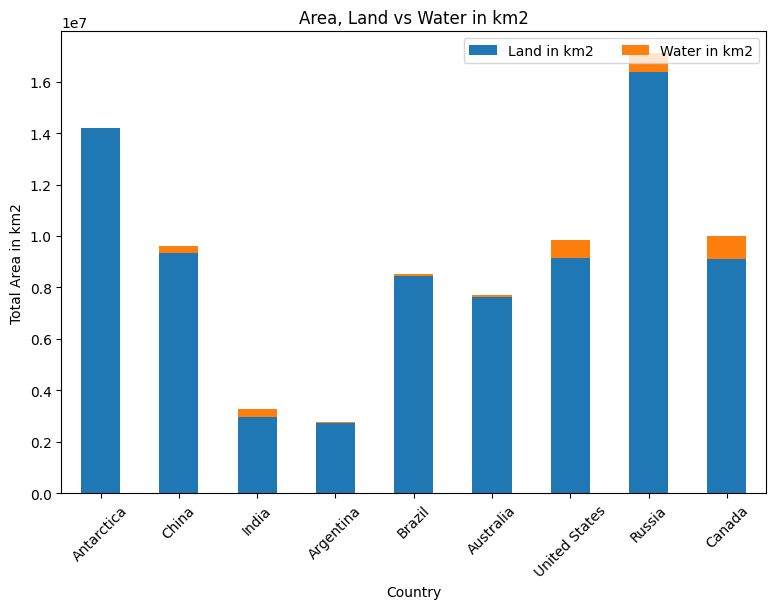

In [32]:
land_column = world_area3["Land in km2"][0:5].sort_values()
water_column = world_area3["Water in km2"][0:5].sort_values()
world_area3 = world_area3.replace(',', '', regex=True)
total_column = world_area3["Total area in km2"].apply(lambda x: float(x))
total_column = total_column [0:5]
total = world_area3[0:10].sort_values(by = "Water in km2")
total = total.set_index("Country/Territory/Dependency")
total["Land in km2"] = total["Land in km2"].astype(int)
total["Water in km2"] = total["Water in km2"].astype(int)
total = total.drop("Total area in km2",axis=1)
total = total.drop("Earth", axis=0)
plt.figure(figsize=(20,6))
ax=plt.subplot(121)
total.plot.bar(stacked=True,ax=ax)
ax.set_xticklabels(total.index, rotation = 45)
ax.set(title="Area, Land vs Water in km2", xlabel='Country', ylabel='Total Area in km2')
ax.legend(loc = "upper right", ncol = 6)


Some interesting insight from the data is the fact that despite the globe being mostly water, 361,132,000 km2 of water to 148,940,000 km2 of land, the majority of these countries/dependencies areas are land, with countries like the USA, Russia, and Canada possessing a consequential amount of water, and countries like Argentina possessing almost no water. Another insight is that despite being a continent, Antarctica is smaller than Russia, a country.